# Unzip Image Folders

In [1]:
%pwd
%mkdir "Images"
!unzip /content/drive/MyDrive/Testing/gtFine_trainvaltest.zip
%mv /content/content/drive/MyDrive/Testing/gtFine_trainvaltest /content/Images
!unzip /content/drive/MyDrive/Testing/leftImg8bit_trainvaltest.zip
%mv /content/content/drive/MyDrive/Testing/leftImg8bit_trainvaltest /content/Images

Streaming output truncated to the last 5000 lines.
  inflating: content/drive/MyDrive/Testing/leftImg8bit_trainvaltest/leftImg8bit/val/munster/munster_000048_000019_leftImg8bit.png  
  inflating: content/drive/MyDrive/Testing/leftImg8bit_trainvaltest/leftImg8bit/val/munster/munster_000041_000019_leftImg8bit.png  
  inflating: content/drive/MyDrive/Testing/leftImg8bit_trainvaltest/leftImg8bit/val/munster/munster_000049_000019_leftImg8bit.png  
  inflating: content/drive/MyDrive/Testing/leftImg8bit_trainvaltest/leftImg8bit/val/munster/munster_000024_000019_leftImg8bit.png  
  inflating: content/drive/MyDrive/Testing/leftImg8bit_trainvaltest/leftImg8bit/val/munster/munster_000082_000019_leftImg8bit.png  
  inflating: content/drive/MyDrive/Testing/leftImg8bit_trainvaltest/leftImg8bit/val/munster/munster_000078_000019_leftImg8bit.png  
  inflating: content/drive/MyDrive/Testing/leftImg8bit_trainvaltest/leftImg8bit/val/munster/munster_000040_000019_leftImg8bit.png  
  inflating: content/driv

#Copy InternImage to Content Space

In [ ]:
#%mkdir "Work_Space"
#%pwd
%cp -r /content/drive/MyDrive/Testing/InternImage /content/Work_Space

# Install Requirements

In [2]:
!pip install torch==1.11.0+cu113 torchvision==0.12.0+cu113  -f https://download.pytorch.org/whl/torch_stable.html
!pip install -U openmim
!mim install mmcv-full==1.5.0
!pip install timm==0.6.11 mmdet==2.28.1
!pip install -U openmim
!mim install mmcv-full==1.5.0
!pip install timm==0.6.11 mmdet==2.28.1
!pip install opencv-python termcolor yacs pyyaml scipy
!pip install segmentation_models_pytorch

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in links: https://download.pytorch.org/whl/torch_stable.html
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 GB 945.0 kB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 22.3/22.3 MB 62.8 MB/s eta 0:00:00
  Attempting uninstall: torch
    Found existing installation: torch 2.0.0+cu118
    Uninstalling torch-2.0.0+cu118:
      Successfully uninstalled torch-2.0.0+cu118
  Attempting uninstall: torchvision
    Found existing installation: torchvision 0.15.1+cu118
    Uninstalling torchvision-0.15.1+cu118:
      Successfully uninstalled torchvision-0.15.1+cu118
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
torchtext 0.15.1 requires torch==2.0.0, but you have torch 1.11.0+cu113 which is incompatible.
torchdata 0.6.0 requires torch==2.0.0, but

# Change Directories

In [3]:
%cd drive/
%cd MyDrive/
%cd Testing/
%cd InternImage/
%cd classification
%cd ops_dcnv3
%ls


/content/drive
/content/drive/MyDrive
/content/drive/MyDrive/Testing
/content/drive/MyDrive/Testing/InternImage
/content/drive/MyDrive/Testing/InternImage/classification
/content/drive/MyDrive/Testing/InternImage/classification/ops_dcnv3
build/           dist/       make.sh   setup.py  test.py
DCNv3.egg-info/  functions/  modules/  src/


#Import Modules

In [4]:
import torch
from torch.utils.data import Dataset, DataLoader
from torchvision import transforms
import matplotlib.pyplot as plt
import sys
import torch.nn as nn
from segmentation_models_pytorch.base import modules as md
import torch.nn.functional as F
import os
import numpy as np
from PIL import Image

# Check CUDA is Available

In [5]:
torch.cuda.is_available()

True

# Build DCNv3 System

In [6]:
%%sh ./make.sh

running build
running build_py
running build_ext
running install
running bdist_egg
running egg_info
writing DCNv3.egg-info/PKG-INFO
writing dependency_links to DCNv3.egg-info/dependency_links.txt
writing top-level names to DCNv3.egg-info/top_level.txt
reading manifest file 'DCNv3.egg-info/SOURCES.txt'
writing manifest file 'DCNv3.egg-info/SOURCES.txt'
installing library code to build/bdist.linux-x86_64/egg
running install_lib
creating build/bdist.linux-x86_64/egg
creating build/bdist.linux-x86_64/egg/functions
copying build/lib.linux-x86_64-3.10/functions/dcnv3_func.py -> build/bdist.linux-x86_64/egg/functions
copying build/lib.linux-x86_64-3.10/functions/__init__.py -> build/bdist.linux-x86_64/egg/functions
creating build/bdist.linux-x86_64/egg/modules
copying build/lib.linux-x86_64-3.10/modules/__init__.py -> build/bdist.linux-x86_64/egg/modules
copying build/lib.linux-x86_64-3.10/modules/dcnv3.py -> build/bdist.linux-x86_64/egg/modules
copying build/lib.linux-x86_64-3.10/DCNv3.cpyth

/usr/local/lib/python3.10/dist-packages/torch/utils/cpp_extension.py:387: UserWarning: Attempted to use ninja as the BuildExtension backend but we could not find ninja.. Falling back to using the slow distutils backend.
  warnings.warn(msg.format('we could not find ninja.'))
/usr/local/lib/python3.10/dist-packages/torch/utils/cpp_extension.py:788: UserWarning: The detected CUDA version (11.8) has a minor version mismatch with the version that was used to compile PyTorch (11.3). Most likely this shouldn't be a problem.
  warnings.warn(CUDA_MISMATCH_WARN.format(cuda_str_version, torch.version.cuda))
/usr/lib/python3.10/distutils/cmd.py:62: SetuptoolsDeprecationWarning: setup.py install is deprecated.
!!

        ********************************************************************************
        Please avoid running ``setup.py`` directly.
        Instead, use pypa/build, pypa/installer, pypa/build or
        other standards-based tools.

        See https://blog.ganssle.io/articles/2

# Test Build is Sucessful

In [7]:
%%python test.py

>>> forward double
* True check_forward_equal_with_pytorch_double: max_abs_err 8.16e-10 max_rel_err nan
>>> forward float
* True check_forward_equal_with_pytorch_float: max_abs_err 1.75e-09 max_rel_err nan
>>> backward double: channels 1
* True input_grad check_backward_equal_with_pytorch_double: max_abs_err 1.19e-07 max_rel_err nan
* True offset_grad check_backward_equal_with_pytorch_double: max_abs_err 1.51e-09 max_rel_err nan
* True mask_grad check_backward_equal_with_pytorch_double: max_abs_err 3.26e-09 max_rel_err nan
>>> backward double: channels 16
* True input_grad check_backward_equal_with_pytorch_double: max_abs_err 1.49e-07 max_rel_err nan
* True offset_grad check_backward_equal_with_pytorch_double: max_abs_err 1.02e-08 max_rel_err nan
* True mask_grad check_backward_equal_with_pytorch_double: max_abs_err 4.34e-08 max_rel_err nan
>>> backward double: channels 30
* True input_grad check_backward_equal_with_pytorch_double: max_abs_err 1.34e-07 max_rel_err nan
* True offset_gra

/usr/local/lib/python3.10/dist-packages/torch/functional.py:568: UserWarning: torch.meshgrid: in an upcoming release, it will be required to pass the indexing argument. (Triggered internally at  ../aten/src/ATen/native/TensorShape.cpp:2228.)
  return _VF.meshgrid(tensors, **kwargs)  # type: ignore[attr-defined]


#Change Directory

In [8]:
%cd ..
!ls

/content/drive/MyDrive/Testing/InternImage/classification
config.py	    internimage_xl_22kto1k_384.pth   models
configs		    internimage_xl_22kto1k_384.yaml  ops_dcnv3
create_model.py     logger.py			     optimizer.py
dataset		    lr_scheduler.py		     __pycache__
ddp_hooks.py	    main_accelerate.py		     README.md
ema_deepspeed.py    main_deepspeed.py		     train_in1k_deepspeed.sh
export.py	    main.py			     train_in1k.sh
extract_feature.py  meta_data			     utils.py


# Add DCNv3 Build to Path

In [9]:
!find . -name "DCNv3*"
sys.path.append('./ops_dcnv3/build/lib.linux-x86_64-3.9')
sys.path.append('./ops_dcnv3/build/lib.linux-x86_64-3.10')
sys.path.append('./ops_dcnv3/build/lib.linux-x86_64-3.9/DCNv3.cpython-39-x86_64-linux-gnu.so')
sys.path.append('./ops_dcnv3/build/lib.linux-x86_64-3.10/DCNv3.cpython-310-x86_64-linux-gnu.so')
sys.path.append('/content/drive/MyDrive/Testing/labels.py')


./ops_dcnv3/build/lib.linux-x86_64-3.9/DCNv3.cpython-39-x86_64-linux-gnu.so
./ops_dcnv3/build/lib.linux-x86_64-3.10/DCNv3.cpython-310-x86_64-linux-gnu.so
./ops_dcnv3/dist/DCNv3-1.1-py3.9-linux-x86_64.egg
./ops_dcnv3/dist/DCNv3-1.1-py3.10-linux-x86_64.egg
./ops_dcnv3/DCNv3.egg-info


In [10]:
!ls

config.py	    internimage_xl_22kto1k_384.pth   models
configs		    internimage_xl_22kto1k_384.yaml  ops_dcnv3
create_model.py     logger.py			     optimizer.py
dataset		    lr_scheduler.py		     __pycache__
ddp_hooks.py	    main_accelerate.py		     README.md
ema_deepspeed.py    main_deepspeed.py		     train_in1k_deepspeed.sh
export.py	    main.py			     train_in1k.sh
extract_feature.py  meta_data			     utils.py


# Create model

In [11]:
#from create_model import create_model_from_config
#cfg_file = 'internimage_xl_22kto1k_384.yaml'
#model = create_model_from_config(cfg_file)

# Transfer Model to GPU

In [ ]:
#gpu_model = model.cuda()
#weights = torch.load("internimage_xl_22kto1k_384.pth", map_location=torch.device('cuda'))
#gpu_model.load_state_dict(weights["model"], strict=False)
#print(gpu_model)

# Check Model Layer Outputs

In [ ]:
#input_tensor = torch.randn(1, 3, 384, 384).cuda()
#output, level_tensors = gpu_model(input_tensor)
#print(level_tensors[0].size())
#print(level_tensors[1].size())
#print(level_tensors[2].size())
#print(output.size()) 

# Create UNET System

In [12]:
from create_model import create_model_from_config
class DecoderBlock(nn.Module):
    def __init__(
        self,
        in_channels,
        skip_channels,
        out_channels,
        use_batchnorm=True,
        attention_type="scse",
    ):
        super().__init__()
        self.conv1 = md.Conv2dReLU(
            in_channels + skip_channels,
            out_channels,
            kernel_size=3,
            padding=1,
            use_batchnorm=use_batchnorm,
        )
        self.attention1 = md.Attention(
            attention_type, in_channels=in_channels + skip_channels)
        self.conv2 = md.Conv2dReLU(
            out_channels,
            out_channels,
            kernel_size=3,
            padding=1,
            use_batchnorm=use_batchnorm,
        )

        self.attention2 = md.Attention(
            attention_type, in_channels=out_channels)
        self.in_channels = in_channels
        self.out_channels = out_channels
        self.skip_channels = skip_channels

    def forward(self, x, skip=None):
        #print("xInp size:", x.size())
        if skip is None:
            #print("Skip is none:")
            x = x.permute(0,3,1,2)
            x = F.interpolate(x, scale_factor=2, mode="nearest")
            #print("xInt size:", x.size())
        else:
            #print("Skip is present:")
            if x.shape != skip.shape:
                #print("Skip size", skip.size())
                x = x.permute(0,3,1,2)
                x = F.interpolate(x, scale_factor=2, mode="nearest")
                x = x.permute(0,2,3,1)
                #print("xInt size:", x.size())
        if skip is not None:
            #print("x    size :", x.size())            
            #print("Skip size:", skip.size())
            x = torch.cat([x, skip], dim=3)
            #print("Conc size:", x.size())
            x = self.attention1(x)
            #print("Att1 size:", x.size())
            x = x.permute(0,3,1,2)
            #print("Perm size:", x.size())
        x = self.conv1(x)
        #print("Con1 size:", x.size())
        x = self.conv2(x)
        #print("Con2 size:", x.size())
        #print("b4 SCSE", x.size())
        x = self.attention2(x)
        #print("Att2 size:", x.size())
        x = x.permute(0,2,3,1)
        #print("Perm size:", x.size())
        

        return x


class UnetDecoder(nn.Module):
    def __init__(
        self,
        encoder_channels,
        decoder_channels,
        n_blocks=5,
        use_batchnorm=True,
        attention_type=None,
    ):
        super().__init__()

        # print("ENCODER CHANNELS", encoder_channels)
        # remove first skip with same spatial resolution
        # encoder_channels = encoder_channels[1:]
        #print(encoder_channels)
        # reverse channels to start from head of encoder
        encoder_channels = encoder_channels[::-1]
        #print("ENCODER CHANNELS", encoder_channels)
        # computing blocks input and output channels
        head_channels = encoder_channels[0]
        in_channels = [head_channels] + list(decoder_channels[:-1])
        skip_channels = list(encoder_channels[1:]) + [0]
        #print("SKIP CHANNELS", skip_channels)
        out_channels = decoder_channels
        #print("DECODER CHANNELS", out_channels)
        #print("***********************************************")

        # combine decoder keyword arguments
        kwargs = dict(use_batchnorm=use_batchnorm,
                      attention_type=attention_type)
        blocks = [
            DecoderBlock(in_ch, skip_ch, out_ch, **kwargs)
            for in_ch, skip_ch, out_ch in zip(in_channels, 
                                              skip_channels, 
                                              out_channels)
        ]
        self.blocks = nn.ModuleList(blocks)

    def forward(self, *features):

        # features = features[1:] # remove 1st skip with same spatial res
        # reverse channels to start from head of encoder
        features = features[::-1]
        #print("FEATURES 4", features[0].size())
        #print("FEATURES 3", features[1].size())
        #print("FEATURES 2", features[2].size())
        #print("FEATURES 1", features[3].size())
        #print("FEATURES 0", features[4].size())
        head = features[0]
        skips = features[1:]
        #print("SKIPS", skips[0].size())

        x = nn.Identity()(head)
        for i, decoder_block in enumerate(self.blocks):
            skip = skips[i] if i < len(skips) else None
            #print("skip", skip.size())
            x = decoder_block(x, skip)
            #print("Decoder ", i ,":", x.size())
            #print("**********************************")

        return x


class SegmentationHead(nn.Sequential):
    def __init__(self, in_channels, out_channels, kernel_size=3, upsampling=1):
        conv2d = nn.Conv2d(in_channels, out_channels,
                           kernel_size=kernel_size, padding=kernel_size // 2)
        upsampling = nn.UpsamplingBilinear2d(
            scale_factor=upsampling) if upsampling > 1 else nn.Identity()
        super().__init__(conv2d, upsampling)


class unet_intern(nn.Module):

    def __init__(
        self, img_size=384
    ):
        super().__init__()

        cfg_file = 'internimage_xl_22kto1k_384.yaml'
        self.encoder = create_model_from_config(cfg_file)
        weights = torch.load("internimage_xl_22kto1k_384.pth", map_location=torch.device('cuda'))
        self.encoder.load_state_dict(weights["model"], strict=False)
        feature_channels = (384, 768, 1536, 1536)
        self.decoder = UnetDecoder(encoder_channels=feature_channels, 
                                   n_blocks=4, 
                                   decoder_channels=(768, 384, 192, 128), 
                                   attention_type=None)

        self.segmentation_head = SegmentationHead(in_channels=128, 
                                                  out_channels=64, 
                                                  kernel_size=3, 
                                                  upsampling=4
                                                  )

    def forward(self, input):
        x, level_tensors = self.encoder(input)
        level_tensors.append(x)
        #print("Encoder  0 :", level_tensors[0].size())
        #print("Encoder  1 :", level_tensors[1].size())
        #print("Encoder  2 :", level_tensors[2].size())
        #print("Encoder  3 :", level_tensors[3].size())
        decoder_output = self.decoder(*level_tensors)
        #print("Decoder Output", decoder_output.size())
        decoder_output = decoder_output.permute(0,3,1,2)
        #print("Decoder Perm  ", decoder_output.size())
        masks = self.segmentation_head(decoder_output)
        #print("TB Output :", masks.size())

        return masks

/content/drive/MyDrive/Testing/InternImage/classification/ops_dcnv3/functions/dcnv3_func.py:19: UserWarning: Module DCNv3 was already imported from /content/drive/MyDrive/Testing/InternImage/classification/./ops_dcnv3/build/lib.linux-x86_64-3.10/DCNv3.cpython-310-x86_64-linux-gnu.so, but /usr/local/lib/python3.10/dist-packages/DCNv3-1.1-py3.10-linux-x86_64.egg is being added to sys.path
  dcn_version = float(pkg_resources.get_distribution('DCNv3').version)


# Create GPU Model

In [13]:
gpu_model = unet_intern(img_size=384).cuda()

=> merge config from internimage_xl_22kto1k_384.yaml
using core type: DCNv3
using activation layer: GELU
using main norm layer: LN
using dpr: linear, 0.2
level2_post_norm: False
level2_post_norm_block_ids: None
res_post_norm: False
remove_center: False
Layers Removed


# Test Model

In [14]:
batch_size = 1
num_channels = 3
height = 384
width = 384
input_tensor = torch.randn(batch_size, num_channels, height, width).cuda()


In [15]:
x = gpu_model(input_tensor)

# CityScapes Dataset Class

In [16]:
class CityscapesDataset(Dataset):
    def __init__(self, root_dir, mode='train', transform=None):
        assert mode in ['train', 'val', 'test'], 'Invalid mode. Choose from ["train", "val", "test"]'

        self.root_dir = root_dir
        self.mode = mode
        self.transform = transform
        self.image_dir = os.path.join(root_dir, 'leftImg8bit_trainvaltest/leftImg8bit', mode)
        self.label_dir = os.path.join(root_dir, 'gtFine_trainvaltest/gtFine', mode)

        self.image_list = []
        self.label_list = []

        for city in os.listdir(self.image_dir):
            city_image_dir = os.path.join(self.image_dir, city)
            city_label_dir = os.path.join(self.label_dir, city)

            for img_name in os.listdir(city_image_dir):
                if img_name.endswith('_leftImg8bit.png'):
                    img_path = os.path.join(city_image_dir, img_name)
                    image_name = img_path.split("\\")[-1]
                    #print(type(image_name))
                    label_name = img_name.replace('_leftImg8bit.png', '_gtFine_labelIds.png')
                    label_path = os.path.join(city_label_dir, label_name)

                    if os.path.exists(img_path):
                        #print(type(img_path))
                        self.image_list.append(img_path)
                    else:
                        print("Image path does not exist")
                    if os.path.exists(label_path):
                        self.label_list.append(label_path)
                    else:
                        print("Label path does not exist")
                        
    def __len__(self):
        return len(self.image_list)

    def __getitem__(self, idx):
        image_path = self.image_list[idx]
        label_path = self.label_list[idx]
        image_name = image_path.split("\\")[-1]
        image = Image.open(image_path).convert('RGB')
        label = Image.open(label_path)

        if self.transform:
            image, label = self.transform(image, label)
            
            
        # Original label IDs from the Cityscapes dataset
        original_ids = [0,   1,   2,   3,   4,   5,   6,   7, 8, 9,   10,  11, 12, 13, 14,  15,  16,  17, 18,  19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29,  30,  31, 32, 33, -1]
        #new_ids =     [255, 255, 255, 255, 255, 255, 255, 0, 1, 255, 255, 2,  3,  4,  255, 255, 255, 5,  255, 6,  7,  8,  9,  10, 11, 12, 13, 14, 15, 255, 255, 16, 17, 18, 255]
        new_ids =      [19,  19,  19,  19,  19,  19,  19,  0, 1, 19,  19,  2,  3,  4,  19,  19,  19,  5,  19,  6,  7,  8,  9,  10, 11, 12, 13, 14, 15, 19,  19,  16, 17, 18, 19]
        # Create the mapping
        mapping = {original: new for original, new in zip(original_ids, new_ids)}
        
        label_array = np.array(label)
        # Apply the mapping to the label array
        label_array = np.vectorize(mapping.get)(label_array)   
        
        label_pro = torch.from_numpy(label_array).long()
        #print("Image shape:", image.shape)
        #print("Label shape:", label_pro.shape)
        #print("Unique values in label:", np.unique(label_array))

        return [image_name, image, label_pro]

# PyTorch Transforms

In [17]:
def cityscapes_transform(image, label):
    # Apply your transformations to the image and label
    image_transform = transforms.Compose([
        transforms.Resize((384, 384)),
        transforms.ToTensor(),
        transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
    ])

    label_transform = transforms.Compose([
        transforms.Resize((384, 384), interpolation=Image.NEAREST),
    ])

    image = image_transform(image)
    label = label_transform(label)
    label = torch.from_numpy(np.array(label, dtype=np.int64))  # Convert the label PIL image to a tensor without adding a channel dimension

    return image, label

# Set the root directory for the Cityscapes dataset

In [18]:
root_dir = '/content/Images'

# Create the Training Dataset

In [19]:
train_dataset = CityscapesDataset(root_dir, mode='train', transform=cityscapes_transform)
print(len(train_dataset))

2975


# Create the Validation Dataset

In [20]:
val_dataset = CityscapesDataset(root_dir, mode='val', transform=cityscapes_transform)
print(len(val_dataset))

500


# Create the Test Dataset

In [21]:
test_dataset = CityscapesDataset(root_dir, mode='test', transform=cityscapes_transform)
print(len(test_dataset))

1525


# Create the Train DataLoader

In [29]:
train_loader = DataLoader(train_dataset, batch_size=4, shuffle=True, num_workers=4)

/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:487: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(


# Create the Val DataLoader

In [30]:
val_loader = DataLoader(val_dataset, batch_size=4, shuffle=True, num_workers=2)

# Create the Test DataLoader

In [31]:
test_loader = DataLoader(test_dataset, batch_size=4, shuffle=True, num_workers=2)

# PyTorch Settings

In [32]:
# Define hyperparameters
learning_rate = 1e-4
# Define loss function and optimizer
#criterion = torch.nn.CrossEntropyLoss(ignore_index=255)
criterion = torch.nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(gpu_model.parameters(), lr=learning_rate)

In [33]:
os.environ['CUDA_LAUNCH_BLOCKING'] = '1'
names, images, labels = next(iter(train_loader))
names, images, labels = names, images.cuda(), labels.cuda()

with torch.no_grad():
    outputs = gpu_model(images)
    print("Images ", images.size(), images.type())
    print("Labels ", labels.size(),  labels.type())
    print("Labels min:", labels.min().item())
    print("Labels max:", labels.max().item())
    print("outputs", outputs.size(), outputs.type())
    loss = criterion(outputs, labels)
    
print("Output shape:", outputs.shape)
print("Loss:", loss.item())

/usr/local/lib/python3.10/dist-packages/torchvision/transforms/transforms.py:332: UserWarning: Argument interpolation should be of type InterpolationMode instead of int. Please, use InterpolationMode enum.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/transforms/transforms.py:332: UserWarning: Argument interpolation should be of type InterpolationMode instead of int. Please, use InterpolationMode enum.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/transforms/transforms.py:332: UserWarning: Argument interpolation should be of type InterpolationMode instead of int. Please, use InterpolationMode enum.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/transforms/transforms.py:332: UserWarning: Argument interpolation should be of type InterpolationMode instead of int. Please, use InterpolationMode enum.
  warnings.warn(


Images  torch.Size([4, 3, 384, 384]) torch.cuda.FloatTensor
Labels  torch.Size([4, 384, 384]) torch.cuda.LongTensor
Labels min: 0
Labels max: 19
outputs torch.Size([4, 64, 384, 384]) torch.cuda.FloatTensor
Output shape: torch.Size([4, 64, 384, 384])
Loss: 1.0137120485305786


# Train the model

In [34]:
os.environ['CUDA_LAUNCH_BLOCKING'] = '1'
epochs = 100

# Train the model
for epoch in range(epochs):
    running_loss = 0.0
    for i, (_, images, labels) in enumerate(train_loader):
        images, labels = images.cuda(), labels.cuda()

        optimizer.zero_grad()

        outputs = gpu_model(images)
        
        #print(images.size(), type(images), images.type())
        #print(labels.size(), type(labels), labels.type())
        #print(outputs.size(),type(outputs), outputs.type())
        
        loss = criterion(outputs, labels)
        print(loss)
        loss.backward()
        optimizer.step()
        running_loss += loss.item()
        if i%100==0:
            print(i)

    # Print average loss for this epoch
    epoch_loss = running_loss / (i + 1)
    print(f"Epoch {epoch + 1}/{epochs} Loss: {epoch_loss:.4f}")

print("Training completed")

/usr/local/lib/python3.10/dist-packages/torchvision/transforms/transforms.py:332: UserWarning: Argument interpolation should be of type InterpolationMode instead of int. Please, use InterpolationMode enum.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/transforms/transforms.py:332: UserWarning: Argument interpolation should be of type InterpolationMode instead of int. Please, use InterpolationMode enum.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/transforms/transforms.py:332: UserWarning: Argument interpolation should be of type InterpolationMode instead of int. Please, use InterpolationMode enum.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/transforms/transforms.py:332: UserWarning: Argument interpolation should be of type InterpolationMode instead of int. Please, use InterpolationMode enum.
  warnings.warn(


tensor(0.8691, device='cuda:0', grad_fn=<NllLoss2DBackward0>)
0
tensor(1.3474, device='cuda:0', grad_fn=<NllLoss2DBackward0>)
tensor(0.8315, device='cuda:0', grad_fn=<NllLoss2DBackward0>)
tensor(0.6453, device='cuda:0', grad_fn=<NllLoss2DBackward0>)
tensor(0.9655, device='cuda:0', grad_fn=<NllLoss2DBackward0>)
tensor(1.2458, device='cuda:0', grad_fn=<NllLoss2DBackward0>)
tensor(0.9067, device='cuda:0', grad_fn=<NllLoss2DBackward0>)
tensor(0.9228, device='cuda:0', grad_fn=<NllLoss2DBackward0>)
tensor(0.8307, device='cuda:0', grad_fn=<NllLoss2DBackward0>)
tensor(1.1322, device='cuda:0', grad_fn=<NllLoss2DBackward0>)
tensor(1.1206, device='cuda:0', grad_fn=<NllLoss2DBackward0>)
tensor(1.0147, device='cuda:0', grad_fn=<NllLoss2DBackward0>)
tensor(0.6228, device='cuda:0', grad_fn=<NllLoss2DBackward0>)
tensor(0.6943, device='cuda:0', grad_fn=<NllLoss2DBackward0>)
tensor(0.7522, device='cuda:0', grad_fn=<NllLoss2DBackward0>)
tensor(0.6970, device='cuda:0', grad_fn=<NllLoss2DBackward0>)
tensor

KeyboardInterrupt: ignored

In [ ]:
!pwd

/content/drive/MyDrive/Testing


In [ ]:
%cd ..

/content/drive/MyDrive/Testing


In [ ]:
import matplotlib.pyplot as plt
from torchvision.transforms.functional import to_pil_image
from labels import trainId2label  # You will need this to map label ids to colors

# Custom function to convert label tensor to an RGB image
def label_to_rgb(label_tensor):
    label_array = label_tensor.numpy()
    label_rgb_array = np.zeros((*label_array.shape, 3), dtype=np.uint8)

    for train_id, label in trainId2label.items():
        if train_id != 19:
            label_rgb_array[label_array == train_id, :] = label.color

    return Image.fromarray(label_rgb_array)

/usr/local/lib/python3.10/dist-packages/torchvision/transforms/transforms.py:332: UserWarning: Argument interpolation should be of type InterpolationMode instead of int. Please, use InterpolationMode enum.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/transforms/transforms.py:332: UserWarning: Argument interpolation should be of type InterpolationMode instead of int. Please, use InterpolationMode enum.
  warnings.warn(


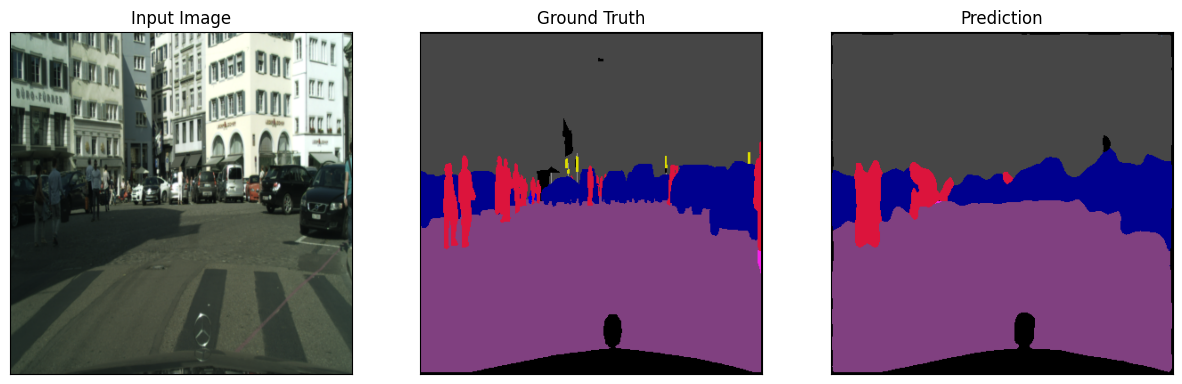

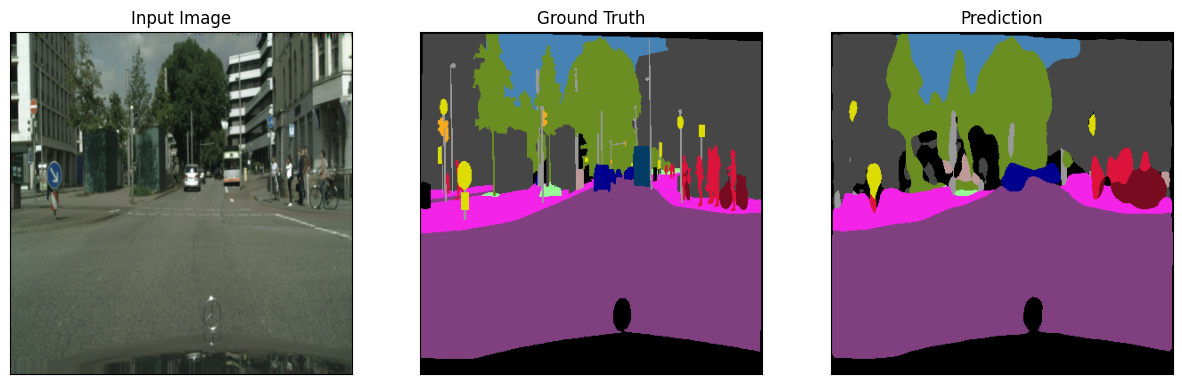

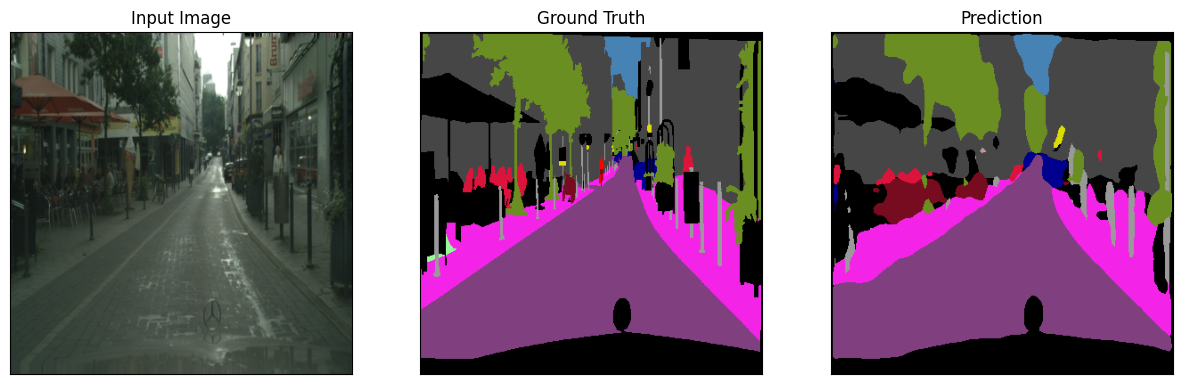

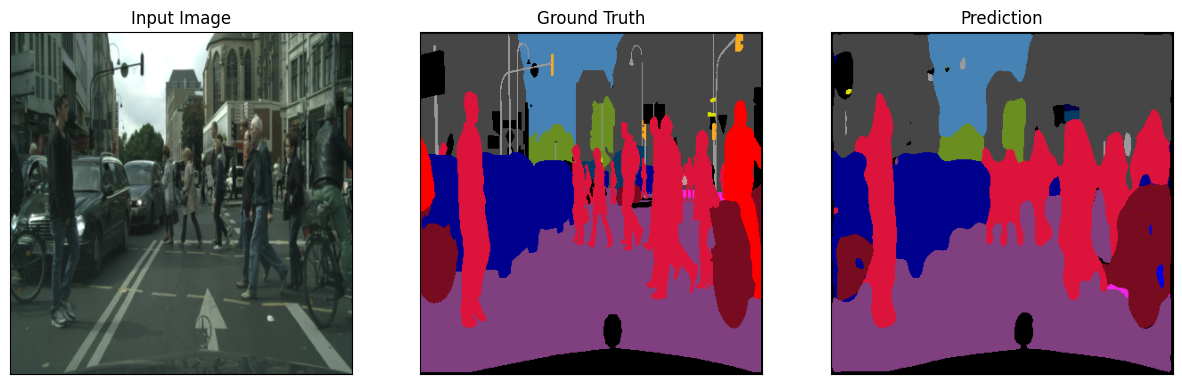

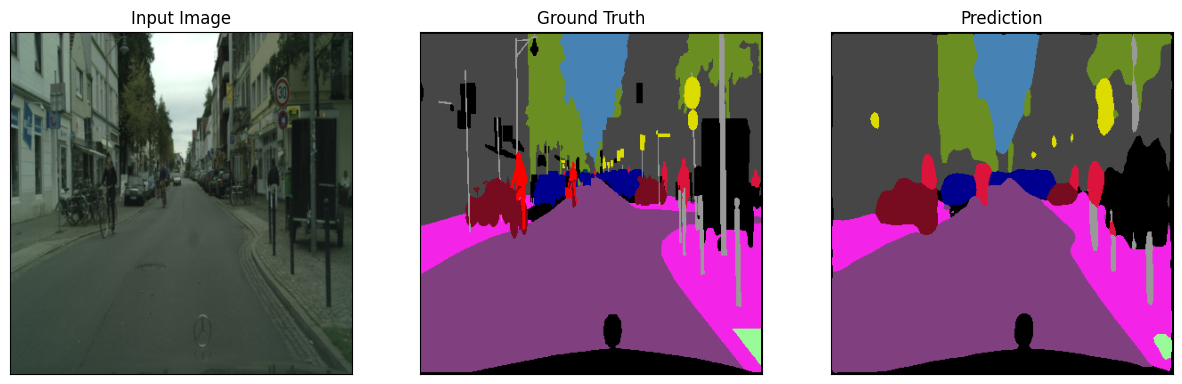

In [ ]:
num_samples = 5
samples_processed = 0

# Add this function to denormalize the images
def denormalize(image, mean, std):
    image = image.clone()
    for t, m, s in zip(image, mean, std):
        t.mul_(s).add_(m)
    return image

# Define the mean and std used for normalization (if any)
mean = [0.485, 0.456, 0.406]  # Replace with the mean you used for normalization
std = [0.229, 0.224, 0.225]  # Replace with the std you used for normalization

# Visualization loop
with torch.no_grad():
    for image_paths, images, labels in train_loader:
        images = images.to('cuda')
        labels = labels.to('cpu')

        # Get model predictions
        outputs = gpu_model(images)
        _, predictions = torch.max(outputs, 1)
        predictions = predictions.to('cpu')

        # Iterate over the batch
        for i in range(images.shape[0]):
            if samples_processed >= num_samples:
                break

            # Convert tensors to images for visualization
            denormalized_image = denormalize(images[i].to('cpu'), mean, std)
            input_image = to_pil_image(denormalized_image)
            ground_truth_label = label_to_rgb(labels[i])
            predicted_label = label_to_rgb(predictions[i])
            
        # Display input image, ground truth label, and predicted label
        fig, axes = plt.subplots(1, 3, figsize=(15, 5))
        axes[0].imshow(input_image)
        axes[0].set_title("Input Image")
        axes[1].imshow(ground_truth_label)
        axes[1].set_title("Ground Truth")
        axes[2].imshow(predicted_label)
        axes[2].set_title("Prediction")

        for ax in axes:
            ax.set_xticks([])
            ax.set_yticks([])

        plt.show()

        samples_processed += 1

        if samples_processed >= num_samples:
            break